In [1]:
data = read.csv2('../data/smp2.csv')

In [3]:
str(data)

'data.frame':	799 obs. of  26 variables:
 $ age         : int  31 49 50 47 23 34 24 52 42 45 ...
 $ prof        : Factor w/ 8 levels "agriculteur",..: 3 NA 7 6 8 6 3 2 6 6 ...
 $ duree       : int  4 NA 5 NA 4 NA NA 5 4 NA ...
 $ discip      : int  0 0 0 0 1 0 0 0 1 0 ...
 $ n.enfant    : int  2 7 2 0 1 3 5 2 1 2 ...
 $ n.fratrie   : int  4 3 2 6 6 2 3 9 12 5 ...
 $ ecole       : int  1 2 2 1 1 2 1 2 1 2 ...
 $ separation  : int  0 1 0 1 1 0 1 0 1 0 ...
 $ juge.enfant : int  0 0 0 0 NA 0 1 0 1 0 ...
 $ place       : int  0 0 0 1 1 0 1 0 0 0 ...
 $ abus        : int  0 0 0 0 0 0 0 0 1 1 ...
 $ grav.cons   : int  1 2 2 1 2 1 5 1 5 5 ...
 $ dep.cons    : int  0 0 0 0 1 0 1 0 1 0 ...
 $ ago.cons    : int  1 0 0 0 0 0 0 0 0 0 ...
 $ ptsd.cons   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ alc.cons    : int  0 0 0 0 0 0 0 0 1 1 ...
 $ subst.cons  : int  0 0 0 0 0 0 1 0 1 0 ...
 $ scz.cons    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ char        : int  1 1 1 1 1 1 1 1 4 1 ...
 $ rs          : int  2 2 2 2 2 1 3

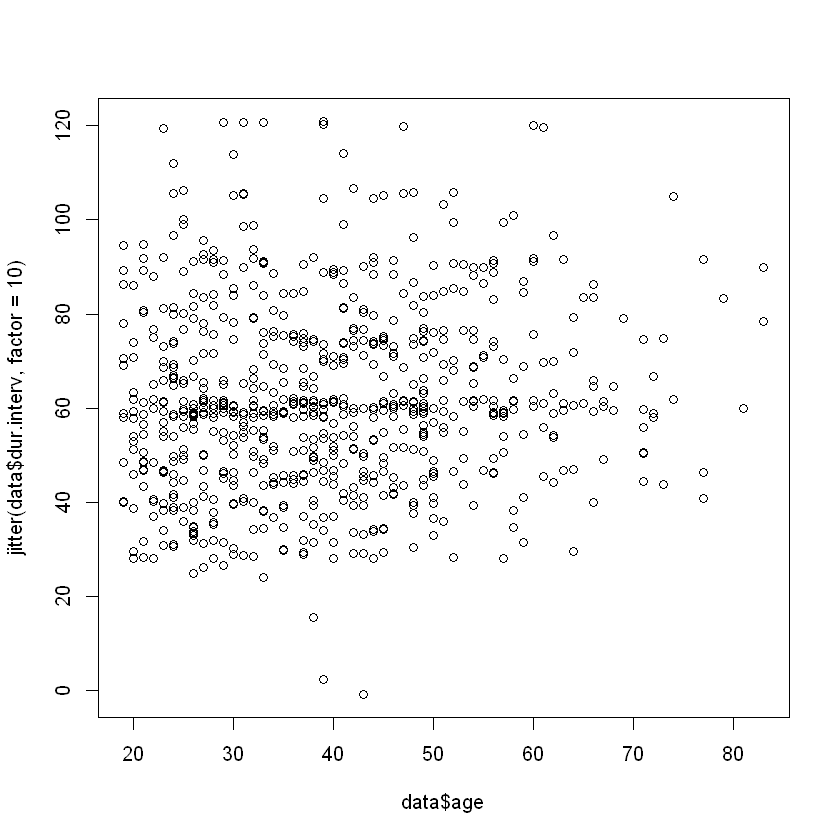

In [10]:
plot(data$age, jitter(data$dur.interv, factor=10))

In [41]:
res = lm(age ~ dur.interv, data=data)

In [42]:
print(res$coefficients)

(Intercept)  dur.interv 
35.49081409  0.05821893 


In [29]:
print(summary(res))


Call:
lm(formula = age ~ dur.interv, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.022 -11.100  -1.275   8.889  42.852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.49081    1.61134  22.026   <2e-16 ***
dur.interv   0.05822    0.02479   2.349   0.0191 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.29 on 745 degrees of freedom
  (52 observations deleted due to missingness)
Multiple R-squared:  0.00735,	Adjusted R-squared:  0.006018 
F-statistic: 5.516 on 1 and 745 DF,  p-value: 0.0191



In [30]:
cor.test(data$dur.interv, data$age)


	Pearson's product-moment correlation

data:  data$dur.interv and data$age
t = 2.3487, df = 745, p-value = 0.0191
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01408787 0.15650345
sample estimates:
       cor 
0.08573358 


r = b $\times$ $\frac{SD(age)}{SD(dur.interv)}$

In [38]:
res$coefficients[2] * (sd(data$age, na.rm=TRUE)/sd(data$dur.interv, na.rm=TRUE))

dur.interv 
 0.0393096

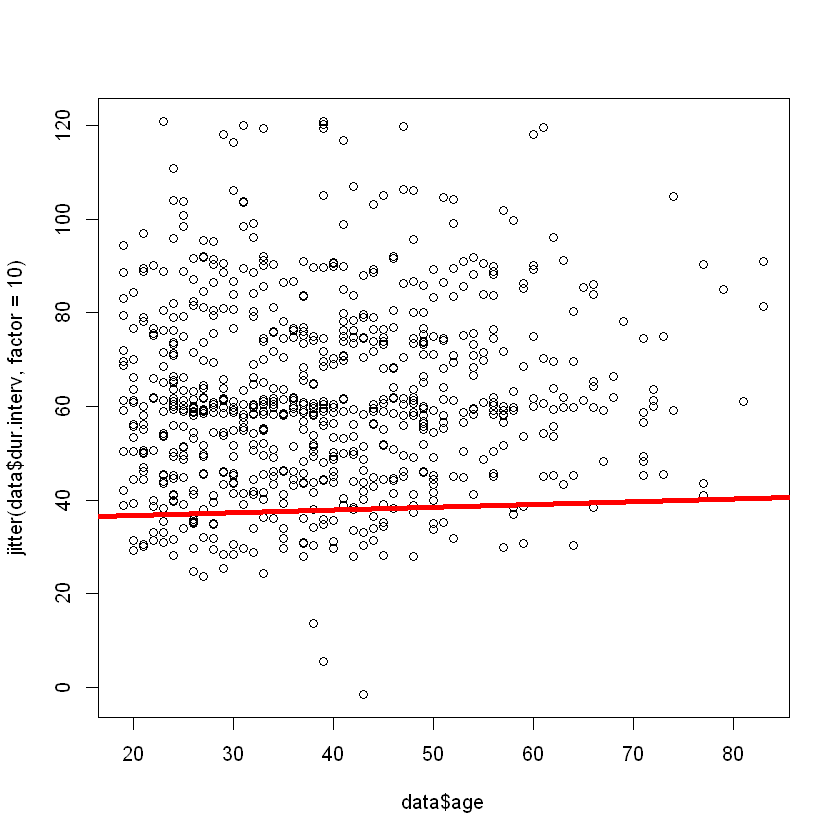

In [23]:
plot(data$age, jitter(data$dur.interv, factor=10))
abline(res, lwd=4, col='red')

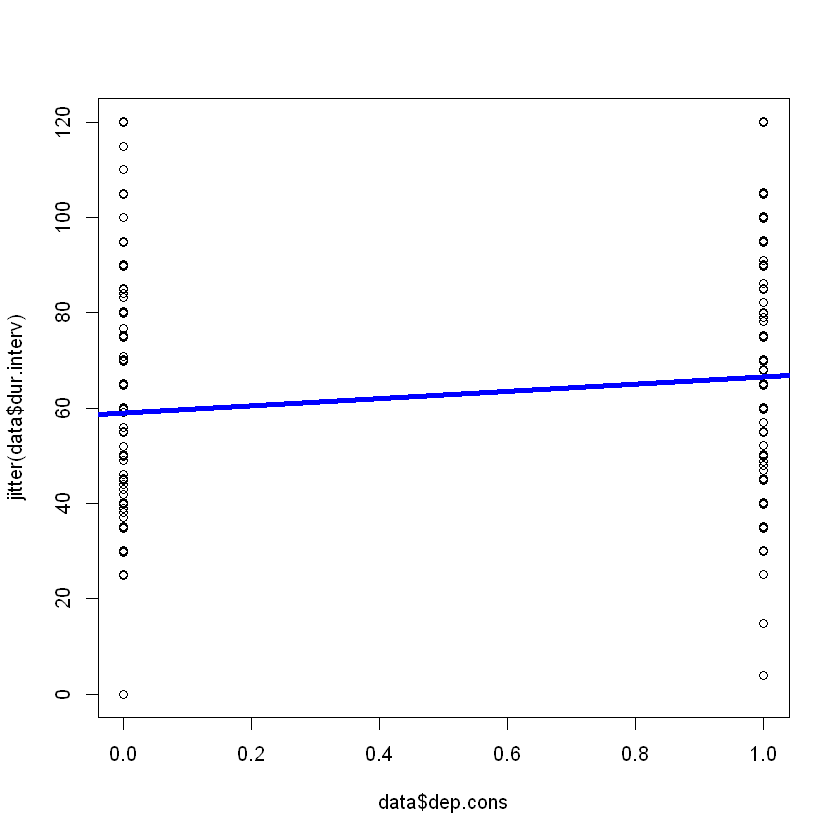

In [45]:
plot(data$dep.cons, jitter(data$dur.interv))
abline(lm(dur.interv~dep.cons, data=data), lwd=4, col='blue')

In [48]:
summary(lm(dur.interv~dep.cons, data=data))


Call:
lm(formula = dur.interv ~ dep.cons, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.538 -13.923   1.077  12.077  61.077 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  58.9234     0.9041  65.171  < 2e-16 ***
dep.cons      7.6143     1.4481   5.258  1.9e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.33 on 747 degrees of freedom
  (50 observations deleted due to missingness)
Multiple R-squared:  0.03569,	Adjusted R-squared:  0.0344 
F-statistic: 27.65 on 1 and 747 DF,  p-value: 1.9e-07


In [47]:
t.test(dur.interv~dep.cons, data=data)


	Welch Two Sample t-test

data:  dur.interv by dep.cons
t = -5.2174, df = 603.99, p-value = 2.498e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.480380  -4.748136
sample estimates:
mean in group 0 mean in group 1 
       58.92341        66.53767 


In [49]:
66.53767 - 58.92341

[1] 7.61426

#### Régression linéaire multiple

dur.interv = a + b x age + c x dep.cons + ... + bruit

In [50]:
mod3 = lm(dur.interv~age+dep.cons+subst.cons+scz.cons,
         data=data)

In [51]:
print(summary(mod3))


Call:
lm(formula = dur.interv ~ age + dep.cons + subst.cons + scz.cons, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.654 -14.522  -1.193  11.482  62.482 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 48.90105    2.62213  18.649  < 2e-16 ***
age          0.22096    0.05708   3.871 0.000118 ***
dep.cons     7.38932    1.44783   5.104 4.24e-07 ***
subst.cons   5.25157    1.74318   3.013 0.002678 ** 
scz.cons     2.27256    2.52323   0.901 0.368062    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.1 on 742 degrees of freedom
  (52 observations deleted due to missingness)
Multiple R-squared:  0.05833,	Adjusted R-squared:  0.05325 
F-statistic: 11.49 on 4 and 742 DF,  p-value: 4.692e-09



##### Introduction d'une variable catégorielle à plus de 2 classes
Recodage binaire pour chaque classe, e.g.
f1 : artisan=1 vs. 0
f2 : cadre=1 vs. 0
etc.

In [53]:
mod4=lm(dur.interv~age+dep.cons+subst.cons+scz.cons+
       prof, data=data)
# category variable detected and recoded automatically

In [54]:
print(summary(mod4))


Call:
lm(formula = dur.interv ~ age + dep.cons + subst.cons + scz.cons + 
    prof, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.280 -14.164  -1.337  10.959  63.184 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             62.79202   10.20779   6.151 1.26e-09 ***
age                      0.21289    0.05884   3.618 0.000317 ***
dep.cons                 7.36792    1.45840   5.052 5.53e-07 ***
subst.cons               5.34589    1.76902   3.022 0.002599 ** 
scz.cons                 2.50439    2.54734   0.983 0.325863    
profartisan            -11.48515    9.82936  -1.168 0.243005    
profautre              -10.28748   10.33482  -0.995 0.319862    
profcadre              -19.29636   10.38568  -1.858 0.063574 .  
profemploye            -13.55809    9.76340  -1.389 0.165358    
profouvrier            -14.01270    9.72111  -1.441 0.149880    
profprof.intermediaire -13.01926    9.96911  -1.306 0.191977    
profsans empl

Il est possible de modifier la référence de cette variable

In [55]:
data$prof = relevel(data$prof, ref='ouvrier')

In [60]:
summary(lm(
    dur.interv~age+dep.cons+subst.cons+scz.cons+prof, data=data))


Call:
lm(formula = dur.interv ~ age + dep.cons + subst.cons + scz.cons + 
    prof, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.280 -14.164  -1.337  10.959  63.184 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            48.77932    2.83938  17.180  < 2e-16 ***
age                     0.21289    0.05884   3.618 0.000317 ***
dep.cons                7.36792    1.45840   5.052 5.53e-07 ***
subst.cons              5.34589    1.76902   3.022 0.002599 ** 
scz.cons                2.50439    2.54734   0.983 0.325863    
profagriculteur        14.01270    9.72111   1.441 0.149880    
profartisan             2.52755    2.48989   1.015 0.310381    
profautre               3.72522    3.99637   0.932 0.351567    
profcadre              -5.28366    4.25567  -1.242 0.214798    
profemploye             0.45460    2.12659   0.214 0.830785    
profprof.intermediaire  0.99344    2.95809   0.336 0.737089    
profsans emploi        -0

Effet global de la catégorie prof

In [61]:
drop1(mod4, .~., test='F')

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,266846.1,4395.612,NA,NA
age,1,4778.3670,271624.5,4406.799,13.0898906,3.173322e-04
dep.cons,1,9317.0855,276163.2,4419.112,25.5232865,5.526601e-07
subst.cons,1,3333.6496,270179.8,4402.837,9.1322221,2.599152e-03
scz.cons,1,352.8378,267198.9,4394.594,0.9665663,3.258633e-01
prof,7,2295.4642,269141.6,4387.976,0.8983157,5.071556e-01


##### interaction entre 2 variables explicatives

In [62]:
mod6=lm(dur.interv~age+dep.cons*subst.cons+scz.cons, data=data)

In [64]:
summary(mod6)


Call:
lm(formula = dur.interv ~ age + dep.cons * subst.cons + scz.cons, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.032 -14.251  -1.163  11.472  62.313 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         49.51693    2.65788  18.630  < 2e-16 ***
age                  0.21728    0.05711   3.805 0.000154 ***
dep.cons             6.15780    1.69775   3.627 0.000306 ***
subst.cons           3.17244    2.29849   1.380 0.167931    
scz.cons             1.97233    2.53094   0.779 0.436059    
dep.cons:subst.cons  4.49688    3.24296   1.387 0.165963    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.08 on 741 degrees of freedom
  (52 observations deleted due to missingness)
Multiple R-squared:  0.06077,	Adjusted R-squared:  0.05443 
F-statistic: 9.588 on 5 and 741 DF,  p-value: 7.024e-09


In [65]:
# attention, les effets des variables simples correspondantes
# ne peuvent pas être interprêtés !

### ANOVA = régression linéaire où les variables explicatives sont toutes catégorielles

In [66]:
mod7=lm(dur.interv~prof, data=data) # exemple à 1 variable

In [67]:
summary(mod7)


Call:
lm(formula = dur.interv ~ prof, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.731 -13.826  -1.731  12.947  58.912 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             61.7315     1.3359  46.211   <2e-16 ***
profagriculteur         17.0185     9.9071   1.718   0.0863 .  
profartisan              2.0941     2.5033   0.837   0.4031    
profautre                2.4993     4.0755   0.613   0.5399    
profcadre               -4.7750     4.3063  -1.109   0.2679    
profemploye              0.3220     2.1742   0.148   0.8823    
profprof.intermediaire   1.3440     3.0096   0.447   0.6553    
profsans emploi         -0.6432     1.9168  -0.336   0.7373    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.63 on 735 degrees of freedom
  (56 observations deleted due to missingness)
Multiple R-squared:  0.008295,	Adjusted R-squared:  -0.001149 
F-statistic: 0.8783 on 7 and

#### conditions de validité d'une régression linéaire
inclut la normalité du bruit, l'indépendance de la variance du bruit et l'absence de structure de corrélation évidente du bruit

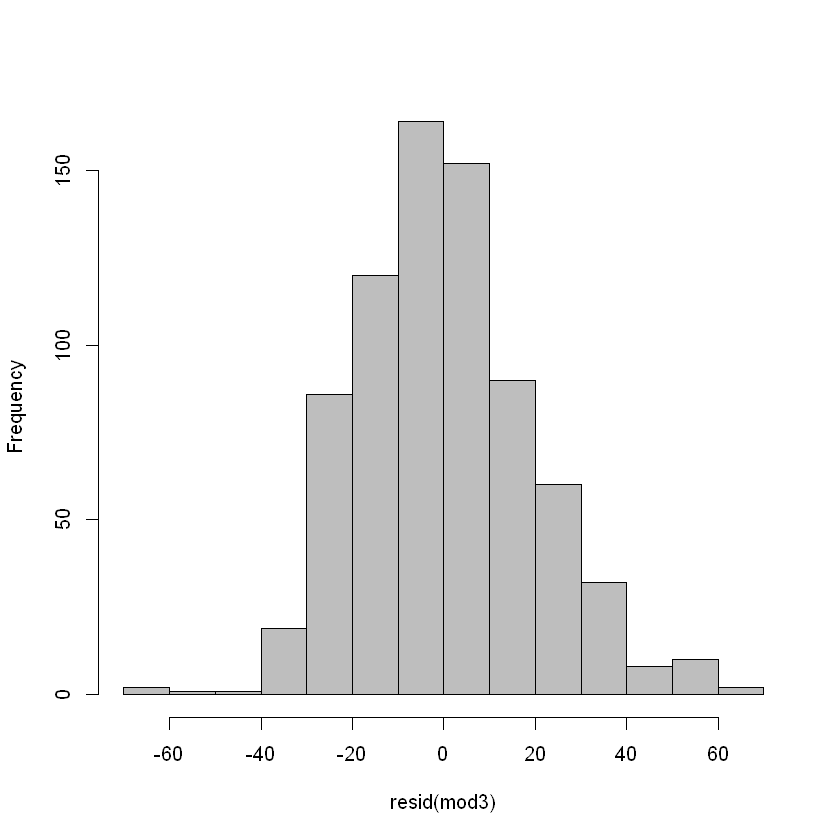

In [68]:
mod3=lm(dur.interv~age+dep.cons+subst.cons+scz.cons, data=data)
hist(resid(mod3), col='grey', main='')

#### regression logistique
lorsque la variable à expliquer est binaire

##### une régression linéaire va potentiellement entre -$\infty$ et +$\infty$, e.g.
a + b $\times$ duree + c $\times$ abus + bruit

$\log$[$\frac{prob(HR suicide=oui)}{1-prob(HR suicide=oui)}$] = a + b $\times$ duree + c $\times$ abus

In [3]:
#simplest example with 1 explicative variable
mod1 = glm(suicide.hr~abus, data=data, family='binomial')

In [4]:
summary(mod1)


Call:
glm(formula = suicide.hr ~ abus, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8446  -0.6020  -0.6020  -0.6020   1.8959  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.6161     0.1154 -14.003  < 2e-16 ***
abus          0.7688     0.1897   4.052 5.07e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 760.21  on 752  degrees of freedom
Residual deviance: 744.26  on 751  degrees of freedom
  (46 observations deleted due to missingness)
AIC: 748.26

Number of Fisher Scoring iterations: 4


In [8]:
OR = exp(mod1$coefficients[2])
print(OR)

    abus 
2.157143 


In [9]:
library(Epi)
twoby2(1-data$suicide.hr, 1-data$abus)

2 by 2 table analysis: 
------------------------------------------------------ 
Outcome   : 0 
Comparing : 0 vs. 1 

    0   1    P(0) 95% conf. interval
0  63  90  0.4118    0.3366   0.4913
1 147 453  0.2450    0.2122   0.2810

                                   95% conf. interval
             Relative Risk: 1.6807    1.3276   2.1276
         Sample Odds Ratio: 2.1571    1.4873   3.1287
Conditional MLE Odds Ratio: 2.1547    1.4577   3.1764
    Probability difference: 0.1668    0.0837   0.2525

             Exact P-value: 1e-04 
        Asymptotic P-value: 1e-04 
------------------------------------------------------


#### régression logistique avec plusieurs variables explicatives

In [10]:
mod2=glm(suicide.hr~abus+discip+duree, 
         data=data, family='binomial')

In [11]:
print(summary(mod2))


Call:
glm(formula = suicide.hr ~ abus + discip + duree, family = "binomial", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3200  -0.6655  -0.6012  -0.4997   2.0700  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.02462    0.49635  -0.050 0.960439    
abus         0.62289    0.22764   2.736 0.006213 ** 
discip       0.52809    0.23767   2.222 0.026287 *  
duree       -0.39862    0.11723  -3.400 0.000673 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 555.94  on 549  degrees of freedom
Residual deviance: 533.26  on 546  degrees of freedom
  (249 observations deleted due to missingness)
AIC: 541.26

Number of Fisher Scoring iterations: 4



In [15]:
# les variables sont codées binaire, avec un coeff de 0.622 pour abus,
# on se rapproche de 1=oui
# attention durée est codé de 1 à 5 (gradation)

In [14]:
print(exp(coefficients(mod2)))

(Intercept)        abus      discip       duree 
  0.9756803   1.8643147   1.6956873   0.6712485 


In [17]:
# possibilité d'étudier les interactions (duree*discip)
drop1(mod1, .~., test='Chisq')

,Df,Deviance,AIC,LRT,Pr(>Chi)
<none>,NA,744.2597,748.2597,NA,NA
abus,1,760.2126,762.2126,15.95292,6.49375e-05


##### conditions de validité (simplifiée)
$\color{red}au$ moins 5-10 évènements par variable explicative